In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hotstep.Basis import Basis
from hotstep.Step import Step
from hotstep.Steps import Steps
from hotstep.Steps import Analysis
import scipy.linalg as spl


In [249]:
def get_sequency(input_array:np.ndarray) -> int:
    
    input_shift = np.roll(input_array,1)
    input_shift[0]= 0
    diffs = input_array + input_shift
    return np.sum(np.where(diffs==0,1,0))
        
def get_walsh_matrix(n:int,dtype=int)-> np.ndarray:
    hadamard = spl.hadamard(n,dtype=dtype)
    sequencies = np.apply_along_axis(get_sequency, 1, hadamard)
    return np.sort(sequencies),hadamard[np.argsort(sequencies)]

def get_walsh_transform(input_values: np.ndarray, pad_mode=None, **kargs) -> np.ndarray:
    
    l = len(input_values)
    scale = 2**(int(np.trunc(np.log2(l))))
    
    if pad_mode is not None and l % scale != 0:
        scale *= 2
        input_values = np.pad(input_values,(0,scale - l),pad_mode,**kargs)
        
    input_scaled = input_values[:scale]
    seq, wm = get_walsh_matrix(scale)
    wt = np.dot(wm,input_scaled)/scale
    
    if pad_mode is not None and l % scale != 0:
        return seq[:l], wt[:l]
    else:
        return seq, wt

def get_inverse_walsh_transform(input_values: np.ndarray, pad_mode=None,**kargs) -> np.ndarray:
    
    l = len(input_values)
    scale = 2**(int(np.trunc(np.log2(l))))
    
    if pad_mode is not None and l % scale != 0:
        scale *= 2
        input_values = np.pad(input_values,(0,scale - l),pad_mode,**kargs)
        
    input_scaled = input_values[:scale]
    
    seq, wm = get_walsh_matrix(scale)
    iwt = np.dot(wm,input_scaled)
    
    if pad_mode is not None and l % scale != 0:
        return seq[:l], iwt[:l]
    else:
        return seq, iwt

def get_sequency_power_spectrum(input_values:np.ndarray,pad_mode=None,**kargs) -> np.ndarray:
    
    s,w = get_walsh_transform(input_values,pad_mode=None,**kargs)
    return s, np.power(w,2)/(np.sum(np.power(w,2)))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 4.5625  1.0625 -2.5625 -1.0625  0.1875 -1.0625 -1.4375 -0.1875  0.1875
  0.1875  0.3125 -0.6875  0.8125 -0.4375 -0.5625 -0.3125]
[0 1 2 3 4 5 6 7]
[ 5.125  0.625 -2.625  0.875 -0.375  0.125 -1.125  0.375]
[0 1 2 3 4 5 6 7]
[ 3.  5.  7.  8.  9.  7.  3. -1.]


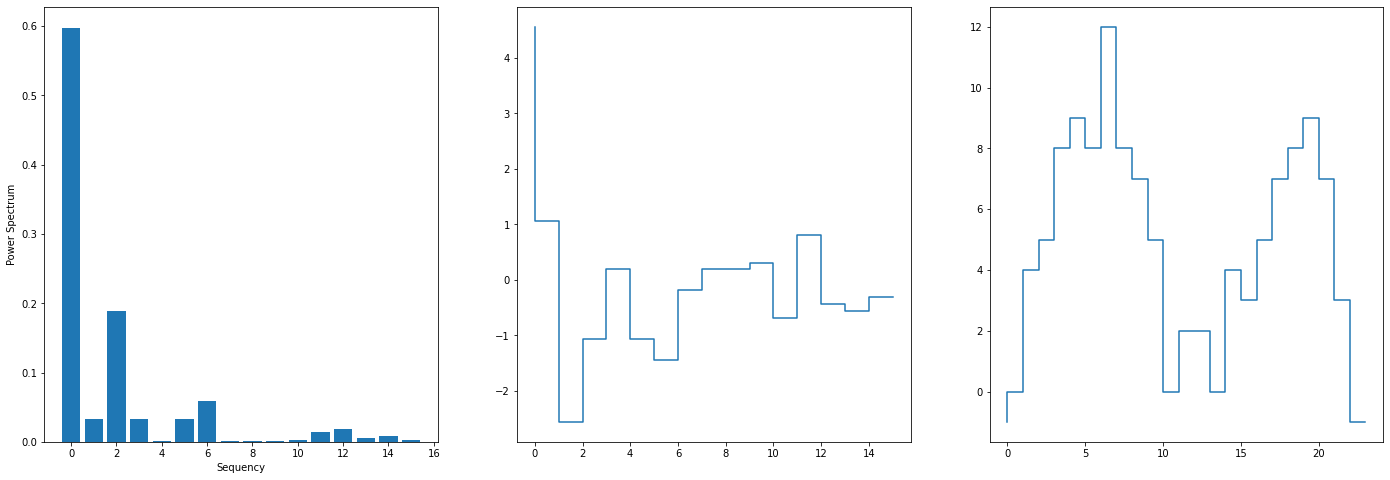

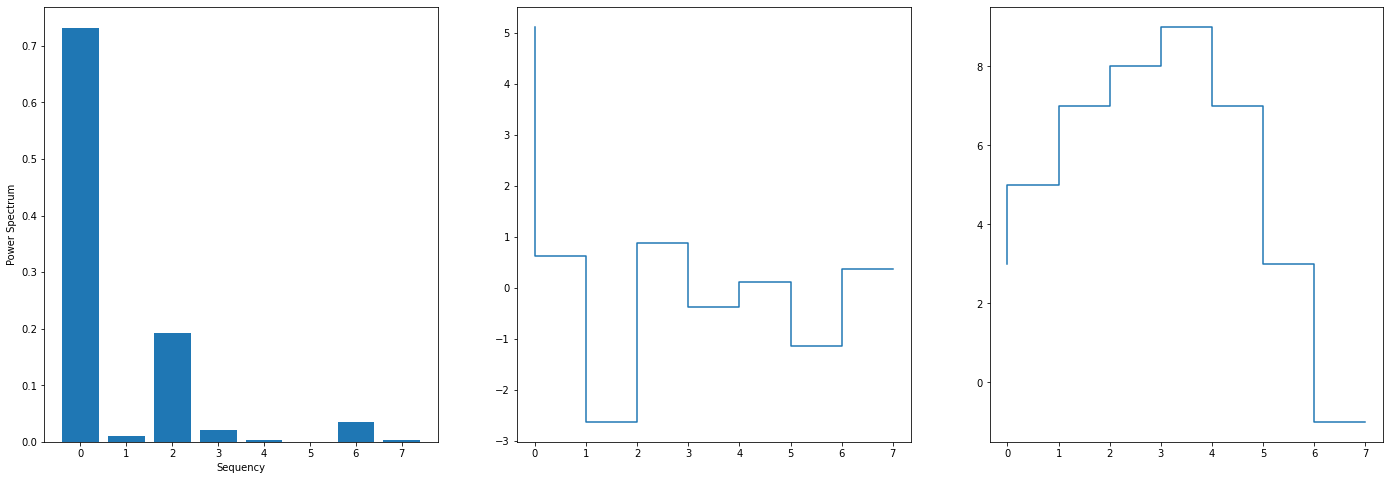

In [270]:
test = np.array([-1, 0, -1, 1, -1, 1, -1, 0,-1, 0, -1, 1, -1, 1, -1, 0,-1, 0, -1, 1, -1, 1, -1, -1])
test = np.array(np.cumsum([np.random.randint(-5,5) for i in range(24)]))

#seq, wh = get_walsh_matrix(8)
#ht = np.dot(wh,test)/8

#ht = fwht(test,1)
#print(ht)
#iht = np.dot(wh,ht)
#print(iht)

# sq,wal = get_walsh_matrix(16)
# print('\n',wal,'\n')
padmode = None #'constant'
s,w = get_walsh_transform(test,padmode)
print(s)
print(w)

# s,iw = get_inverse_walsh_transform(w,padmode)
# print(s)
# print(iw)

s,ps = get_sequency_power_spectrum(test,padmode)

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(24,8))
ax1.bar(s,ps)
ax1.set_xlabel('Sequency')
ax1.set_ylabel('Power Spectrum')

ax2.step(list(range(len(s))),w)

ax3.step(list(range(len(test))),test)


padmode = None #'constant'
s2,w2 = get_walsh_transform(test[16:],padmode)
print(s2)
print(w2)

s2,iw2 = get_inverse_walsh_transform(w2,padmode)
print(s2)
print(iw2)


fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(24,8))
ax1.bar(s2,np.power(w2,2)/(np.sum(np.power(w2,2))))
ax1.set_xlabel('Sequency')
ax1.set_ylabel('Power Spectrum')

ax2.step(list(range(len(s2))),w2)

ax3.step(list(range(len(test[16:]))),test[16:])

### Step and Steps math

In [21]:
tbase = Basis(Basis.sigmoid,5)

s0 = Step(5,4)
s1 = Step(3.75,None,3)
s2 = Step(5.6,6,2)
s3 = Step(8.2,8.8)
s4 = Step(9.2,9.8)
s5 = Step(7.2)
s6 = Step(12,1.5)
s7n = Step(9,weight=-1)
s8n = Step(9.5,weight=-1)


sts1 = s1 + s2 + s3 #+ s0
sts2 = sts1 + s4 - s5
sts3 = s5 + s4 + s7n + s8n - s1
sts4 = sts2 + (s5 >> 2)
sts5 = sts4 - s2
sts5 += (s6 >> 2)
sts6 = sts2 - s3 - sts1 + s4 + sts3 + sts3

### Plotting both Step and Steps using MPL directly

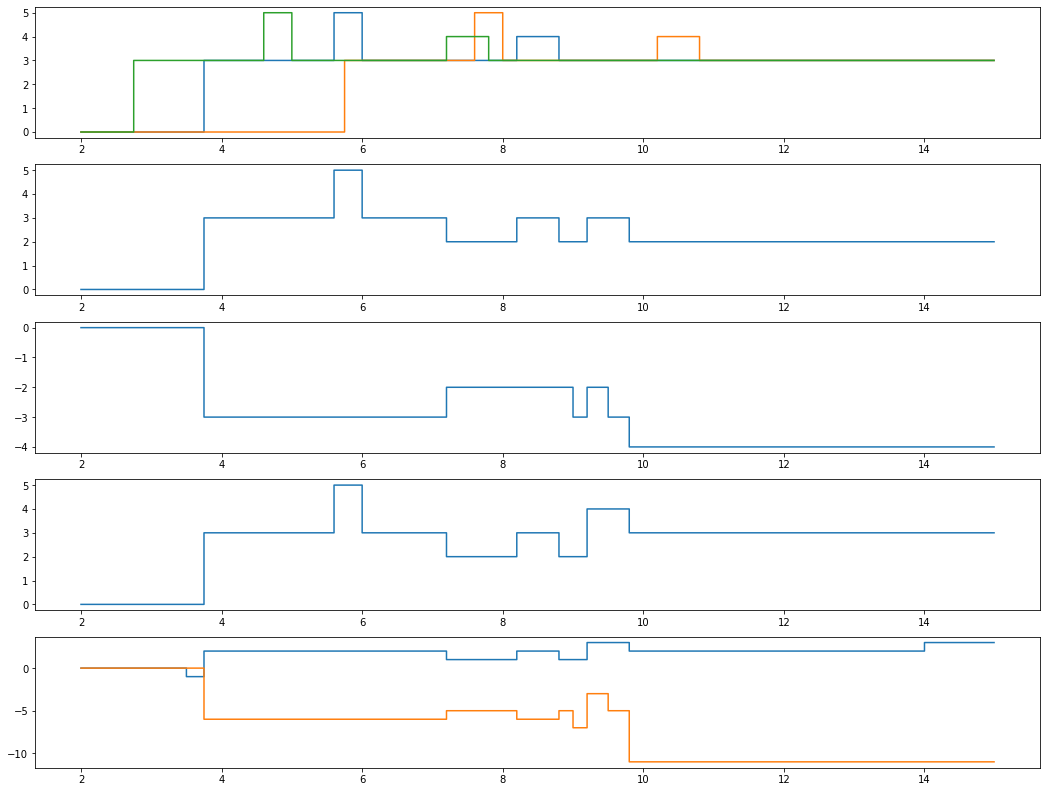

In [22]:
p = np.arange(2,15,0.01)
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

ax[0].step(p,sts1[p])
ax[0].step(p,(sts1>>2)[p])
ax[0].step(p,(sts1<<1)[p])
ax[1].step(p,sts2[p])
ax[2].step(p,sts3[p])
ax[3].step(p,sts4.step(p))
ax[4].step(p,sts5[p])
ax[4].step(p,sts6.step(p))



True

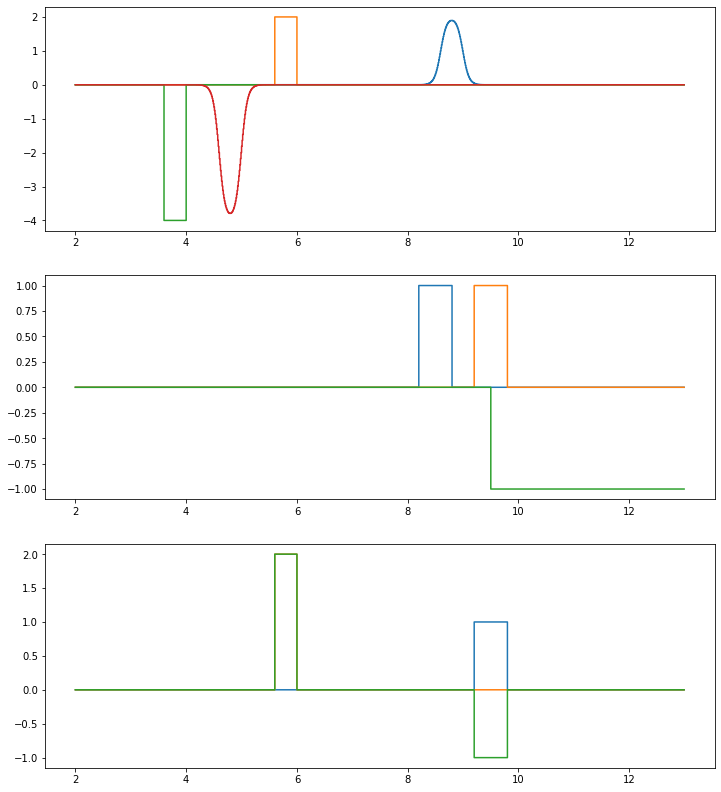

In [4]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=3,figsize=(12,14))

ax[0].step(p,(s2 >> 3).smooth_step(p,smooth_factor=0.0001))
ax[0].step(p,s2[p])
ax[0].step(p,((s2+2).reflect() << 2).step(p))
ax[0].step(p,((s2+2).reflect() << 1).smooth_step(p,smooth_factor=0.0001))
ax[1].step(p,s3.step(p))
ax[1].step(p,s4[p])
ax[1].step(p,s8n[p])
ax[2].step(p,s4[p])
ax[2].step(p,s2[p])
ax[2].step(p,(s4-s2)[p])
#ax[2].step(p,(s4 <<0.25)[p])
#ax[2].step(p,((s4*2)*(s4*3 << 0.25))[p])
#ax[2].step(p,(s4*(s4 << 0.5))[p])

(s4*s4)==s4**2

### Plotting Steps using internal plot

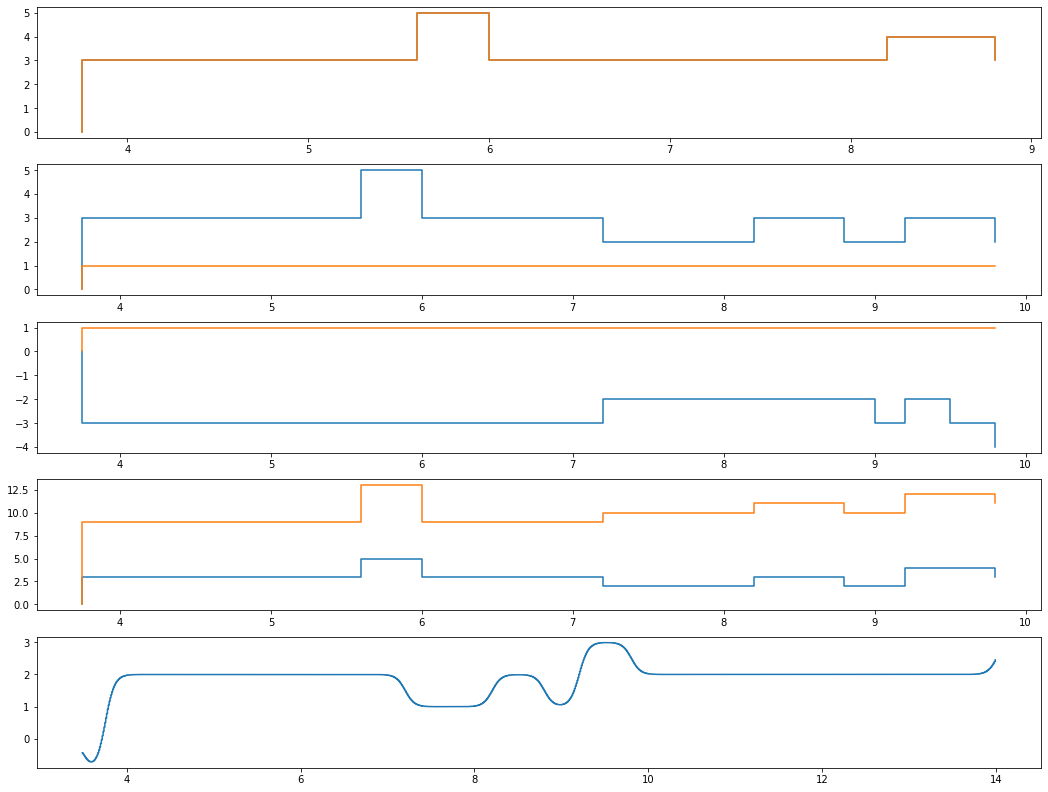

In [5]:
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

sts1.plot(ax=ax[0])
(sts1!=0).plot(ax=ax[0])
sts2.plot(ax=ax[1])
(sts2**2).normalise().plot(ax=ax[1])
sts3.plot(ax=ax[2])
(sts3**2).normalise().plot(ax=ax[2])
sts4.plot(ax=ax[3])
(sts4**2).plot(ax=ax[3])
sts5.plot(ax=ax[4],method='smooth',smooth_factor=0.0001)


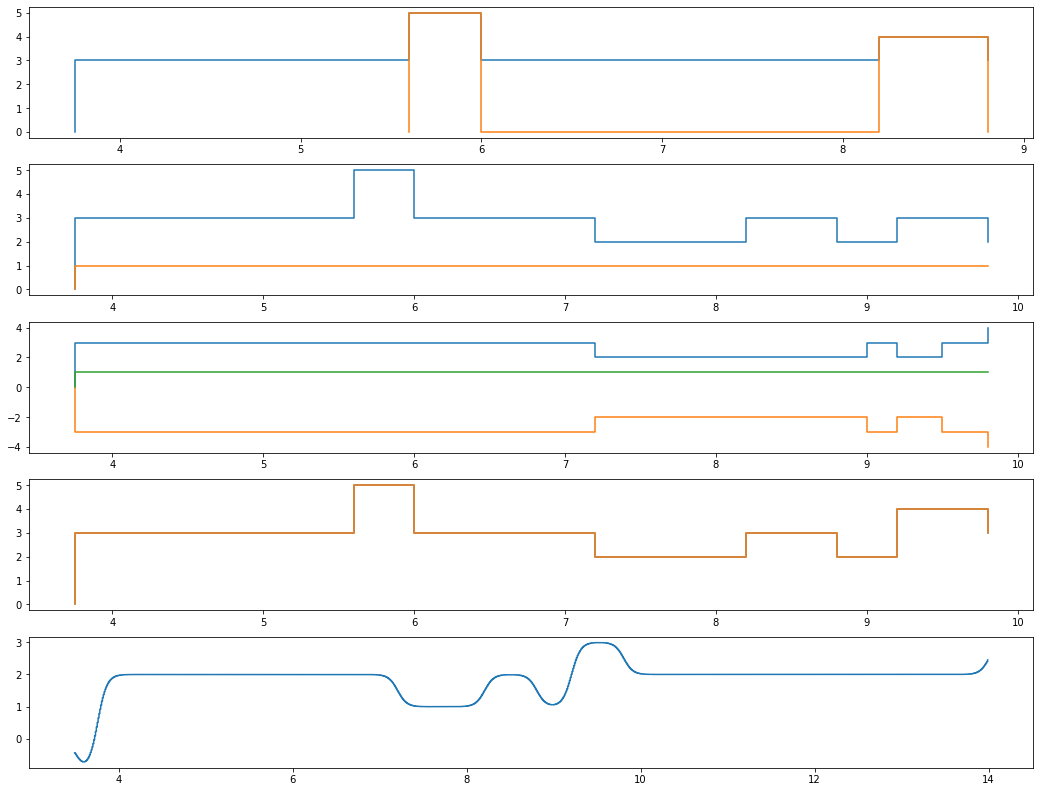

In [6]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

sts1.plot(ax=ax[0])
#ax[0].step(p,(sts1 > 0).step(p))
(sts1>3).plot(ax=ax[0])

sts2.plot(ax=ax[1])
(sts2 > 0).normalise().plot(ax=ax[1])
#sts2.invert().plot(ax=ax[1])
sts3.reflect().plot(ax=ax[2])
sts3.plot(ax=ax[2])
sts3.normalise().plot(ax=ax[2])
#(sts3.reflect() >0).normalise().plot(ax=ax[2])
#sts3.plot(ax=ax[2])

sts4.plot(ax=ax[3])
(sts4>1).plot(ax=ax[3])
sts5.plot(ax=ax[4],method='smooth',smooth_factor=0.0001)


#mask = np.where(sts4._cumsum > 0, 1,0)
#mask


In [7]:
p = np.arange(2,13,0.01)

a = [3,4,2,5,1,4,5,6,5,4,2,1,0,2,3,4,5,6,7]
#a = [1,2,3,4,5,6]
b = [1,-1]

cc = np.convolve(a,b,mode='full') /np.sqrt(2)

cc = -1*cc
#fig,ax = plt.subplots(nrows=2)

cc2 = cc[1:-1:2]
cc2
#np.cumsum([b for b in cc if b not in cc2])
#np.cumsum(cc)


array([-0.70710678, -2.12132034, -2.12132034, -0.70710678,  0.70710678,
        0.70710678, -1.41421356, -0.70710678, -0.70710678])

In [8]:
import pywt
coef = pywt.dwt(a, 'db1',mode='constant')

coef

# fig,ax = plt.subplots()
# ax.plot(a)
# ax.plot(coef[0])
# ax.plot(coef[1])

(array([4.94974747, 4.94974747, 3.53553391, 7.77817459, 6.36396103,
        2.12132034, 1.41421356, 4.94974747, 7.77817459, 9.89949494]),
 array([-0.70710678, -2.12132034, -2.12132034, -0.70710678,  0.70710678,
         0.70710678, -1.41421356, -0.70710678, -0.70710678,  0.        ]))

In [9]:
import cupy as cp
mempool = cp.get_default_memory_pool()

#print(f'pinned: {cp.get_default_pinned_memory_pool()}')

print(mempool.used_bytes())              # 0
print(mempool.total_bytes())
print(cp.get_default_memory_pool().get_limit())

0
248832
0


In [13]:
len(sts5._cumsum)

13

In [14]:
len(sts5._cummulative.values())

10